$\textbf{PROGRAMMING ASSIGNMENT - Lecture 3}$
---

1. Read the article: https://www.sciencedirect.com/science/article/abs/pii/S0031320322001753
2. Read articles about Adjusted Rand Index, Normalized Mutual Information, and Folkes-Mallows Index (only use paper published in IEEE, sciencedirect, springerlink, Taylor Francis).
3. Aside from the Adjusted Rand Index (ARI), and Normalized Mutual Information (NMI), use the Folkes-Mallows Index (FMI), and compare the result of each performance index.
4. Compare and contrast each performance index, what are the advantages and disadvantages of ARI, NMI, and FMI, and when to use each?
5. Using Kmodes and Hierarchical Clustering, use the same dataset and perform categorical data clustering, use FMI, ARI, and NMI for the comparison of performance.
6. Write your report using Latex. Your report should be focused on the "why's and the what's" of each performance metrices (i.e. why is FMI always greater than ARI and NMI? What's the problem with ARI and NMI?).

---

Data: [Soybean (Large)](https://archive.ics.uci.edu/dataset/90/soybean+large)

`Note:` I'll only replicate the study on one of the datasets, since my PC ain't that great, and the goal of this assignment seems to be the comparison of the various clustering performance indices. I'll also drop the evaluation of time, that the research is taking note of, due to the same reason.

In [20]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import fowlkes_mallows_score, adjusted_rand_score, normalized_mutual_info_score

### $\textbf{Exploratory Data Analysis}$

In [5]:
soybean_large = fetch_ucirepo(id=90)
soybean_large.variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,"diaporthe-stem-canker, charcoal-rot, rhizocton...",None,no
1,date,Feature,Categorical,None,"april,may,june,july,august,september,october,?",None,yes
2,plant-stand,Feature,Categorical,None,"normal,lt-normal,?",None,yes
3,precip,Feature,Categorical,None,"lt-norm,norm,gt-norm,?",None,yes
4,temp,Feature,Categorical,None,"lt-norm,norm,gt-norm,?",None,yes
5,hail,Feature,Categorical,None,"yes,no,?",None,yes
6,crop-hist,Feature,Categorical,None,"diff-lst-year,same-lst-yr,same-lst-two-yrs,sam...",None,yes
7,area-damaged,Feature,Categorical,None,"scattered,low-areas,upper-areas,whole-field,?",None,yes
8,severity,Feature,Categorical,None,"minor,pot-severe,severe,?",None,yes
9,seed-tmt,Feature,Categorical,None,"none,fungicide,other,?",None,yes


In [7]:
df = pd.merge(soybean_large.data.features, soybean_large.data.targets, left_index=True, right_index=True)
df.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
1,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
2,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
3,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
4,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker


In [8]:
df.describe()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
count,306.000000,299.000000,296.000000,300.000000,266.000000,306.000000,306.000000,266.000000,266.000000,271.000000,...,296.000000,296.000000,282.000000,272.000000,278.000000,278.000000,272.000000,278.000000,272.000000,300.000000
mean,3.529412,0.464883,1.577703,1.130000,0.206767,1.816993,1.633987,0.778195,0.548872,1.014760,...,0.135135,0.033784,0.549645,1.084559,0.183453,0.111511,0.102941,0.097122,0.058824,0.156667
std,1.712285,0.499601,0.713580,0.622676,0.405750,0.994661,1.078868,0.620145,0.632052,0.798009,...,0.430193,0.180978,0.965241,1.575944,0.387736,0.315331,0.304442,0.296658,0.235728,0.423541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [10]:
df.isna().sum()

date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external-decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit-spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
class               0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isna().sum()

date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external-decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit-spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
class              0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 0 to 289
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             266 non-null    float64
 1   plant-stand      266 non-null    float64
 2   precip           266 non-null    float64
 3   temp             266 non-null    float64
 4   hail             266 non-null    float64
 5   crop-hist        266 non-null    float64
 6   area-damaged     266 non-null    float64
 7   severity         266 non-null    float64
 8   seed-tmt         266 non-null    float64
 9   germination      266 non-null    float64
 10  plant-growth     266 non-null    float64
 11  leaves           266 non-null    int64  
 12  leafspots-halo   266 non-null    float64
 13  leafspots-marg   266 non-null    float64
 14  leafspot-size    266 non-null    float64
 15  leaf-shread      266 non-null    float64
 16  leaf-malf        266 non-null    float64
 17  leaf-mild        266 

### $\textbf{Research on Clustering Performance Indices}$

| Index                        | Description                                                                                                  | Pros                                                 | Cons                                                                                     |
|------------------------------|--------------------------------------------------------------------------------------------------------------|------------------------------------------------------|------------------------------------------------------------------------------------------|
| Adjusted Rand Index (ARI)   | A measure of the similarity between two data clusterings. It adjusts for chance agreement.                    | - Range between -1 and 1.                           | - Sensitive to the number of clusters.                                                  |
|                              |                                                                                                              | - Suitable for evaluating clustering results when the ground truth labels are known.                           | - Scales quadratically with the number of samples.                                       |
| Normalized Mutual Information (NMI) | Measures the amount of information shared between the clustering result and the ground truth labels, normalized by the entropy of the clusterings. | - Normalization accounts for the imbalance in cluster sizes.                                                  | - Can be biased towards detecting similar clusterings.                                    |
|                                  |                                                                                                              | - Not sensitive to the absolute values of the labels.                                                          | - Requires the ground truth labels.                                                       |
| Folkes-Mallows Index (FMI)  | A measure of the similarity between two clusterings. It counts pairs of samples that are either both in the same cluster or in different clusters in both the predicted and true clusterings. | - Intuitive interpretation.                         | - Less robust to noise and outliers compared to ARI and NMI.                             |
|                              |                                                                                                              | - Simple calculation.                               | - Not normalized.                                                                        |


*References:*

ScienceDirect. (2017). Adjusted Rand Index. https://www.sciencedirect.com/topics/computer-science/adjusted-rand-index
McDaid, F. A., Greene, D., & Hurley, N. (2011). Normalized Mutual Information to evaluate overlapping community finding algorithms. Physics and Society. 
https://doi.org/10.48550/arXiv.1110.2515
Nemec, A. F. L., & Brinkhurst, R. O. (2011). The Fowlkes–Mallows Statistic and the Comparison of Two Independently Determined Dendrograms. Canadian Journal of Fisheries and Aquatic Sciences, 45(6), 971-975. https://doi.org/10.1139/f88-119

### $\textbf{KModes vs Hierarchal Clustering}$

In [28]:
X = df.drop(columns=['class'])
y = df['class']

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(X)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(X.columns))

encoded_df.head()

,date_0.0,date_1.0,date_2.0,date_3.0,date_4.0,date_5.0,date_6.0,plant-stand_0.0,plant-stand_1.0,precip_0.0,...,km_clusters_0,km_clusters_1,km_clusters_2,km_clusters_3,km_clusters_4,hc_clusters_0,hc_clusters_1,hc_clusters_2,hc_clusters_3,hc_clusters_4
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
km = KModes(n_clusters=5, init='Huang', n_init=5)
df["km_clusters"] = km.fit_predict(encoded_df)
df["km_clusters"]

0      2
1      2
2      2
3      2
4      2
      ..
285    1
286    3
287    3
288    3
289    3
Name: km_clusters, Length: 266, dtype: uint16

In [30]:
hc = AgglomerativeClustering(n_clusters=5)
df["hc_clusters"] = hc.fit_predict(encoded_df)
df["hc_clusters"]

0      3
1      3
2      3
3      3
4      3
      ..
285    0
286    2
287    2
288    2
289    2
Name: hc_clusters, Length: 266, dtype: int64

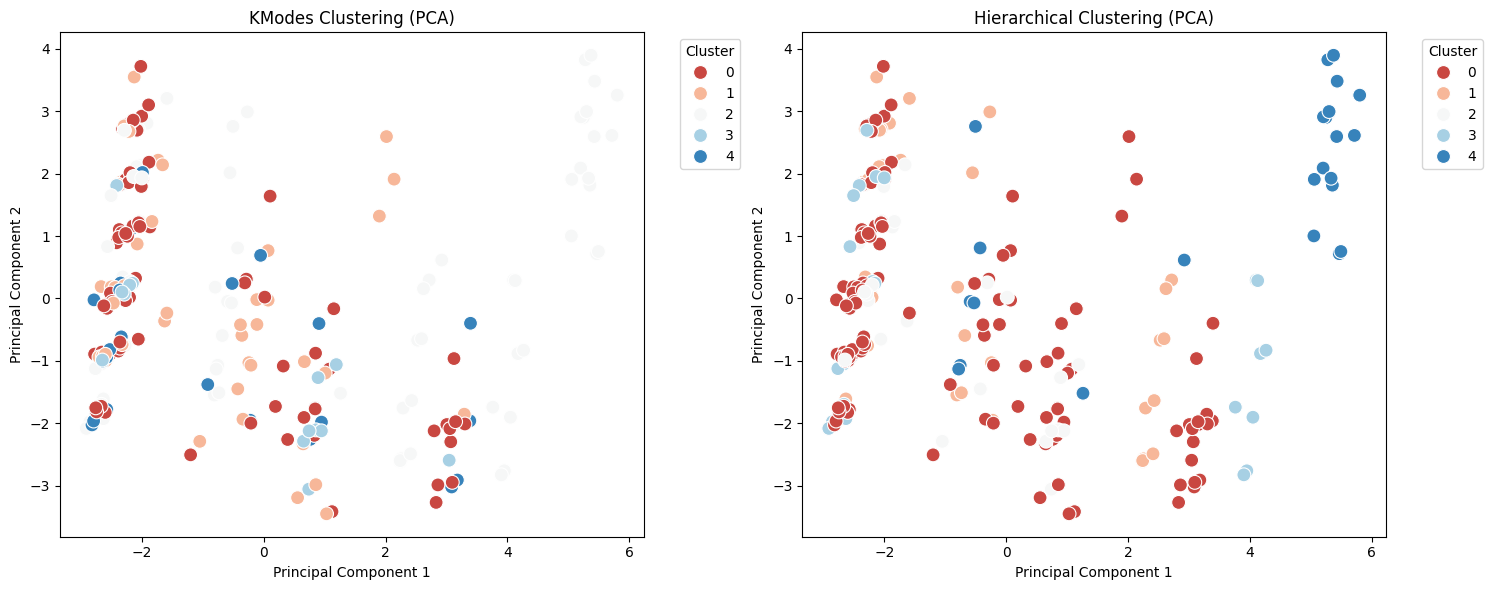

In [33]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df['km_cluster'] = df['km_clusters'].astype('category')
pca_df['hc_cluster'] = df['hc_clusters'].astype('category')

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='km_cluster', s=100, palette='RdBu')
plt.title('KModes Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='hc_cluster', s=100, palette='RdBu')
plt.title('Hierarchical Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [35]:
fmi_km = fowlkes_mallows_score(y, df['km_clusters'])
ari_km = adjusted_rand_score(y, df['km_clusters'])
nmi_km = normalized_mutual_info_score(y, df['km_clusters'])

fmi_hc = fowlkes_mallows_score(y, df['hc_clusters'])
ari_hc = adjusted_rand_score(y, df['hc_clusters'])
nmi_hc = normalized_mutual_info_score(y, df['hc_clusters'])

results = {
    'Method': ['Kmodes', 'Agglomerative Clustering'],
    'FMI': [fmi_km, fmi_hc],
    'ARI': [ari_km, ari_hc],
    'NMI': [nmi_km, nmi_hc]
}

df_results = pd.DataFrame(results)
df_results

,Method,FMI,ARI,NMI
0,Kmodes,0.324151,0.183862,0.404767
1,Agglomerative Clustering,0.431055,0.260804,0.614878


### $\textbf{Report}$

In this report, we analyze the performance of two clustering algorithms, KModes and Agglomerative Clustering, on a dataset containing categorical data. We focus on three performance metrics: Fowlkes-Mallows Index (FMI), Adjusted Rand Index (ARI), and Normalized Mutual Information (NMI). 

### Performance Metrics:
- **Fowlkes-Mallows Index (FMI)**: Measures the similarity between two clusterings by calculating the geometric mean of the pairwise precision and recall.
- **Adjusted Rand Index (ARI)**: Measures the similarity between two clusterings by considering all pairs of samples and counting pairs that are assigned to the same or different clusters in the predicted and true clusterings, adjusted for chance agreement.
- **Normalized Mutual Information (NMI)**: Measures the amount of information shared between the clustering result and the ground truth labels, normalized by the entropy of the clusterings.

In [36]:
df_results

,Method,FMI,ARI,NMI
0,Kmodes,0.324151,0.183862,0.404767
1,Agglomerative Clustering,0.431055,0.260804,0.614878


1. **Fowlkes-Mallows Index (FMI)**:
   - FMI values tend to be higher compared to ARI and NMI in both clustering methods. 
   - FMI considers both precision and recall, making it suitable for imbalanced datasets.
   - It provides a simple and intuitive measure of clustering similarity, but it may not account for the random agreement between clusterings.

2. **Adjusted Rand Index (ARI)**:
   - ARI values are lower compared to FMI and NMI in both clustering methods.
   - ARI adjusts for chance agreement and considers all pairs of samples, making it suitable for evaluating clusterings when the ground truth labels are known.
   - However, ARI is sensitive to the number of clusters and scales quadratically with the number of samples.

3. **Normalized Mutual Information (NMI)**:
   - NMI values are moderate to high, especially for Agglomerative Clustering.
   - NMI normalizes the mutual information by the entropy of the clusterings, accounting for the imbalance in cluster sizes.
   - NMI is less sensitive to the absolute values of the labels, but it may be biased towards detecting similar clusterings and requires the ground truth labels.

### Conclusion:
- FMI provides a robust measure of clustering similarity, particularly for imbalanced datasets.
- ARI adjusts for chance agreement and is suitable for evaluating clusterings with known ground truth labels, but it may not scale well with larger datasets.
- NMI offers a normalized measure of mutual information but may be biased towards detecting similar clusterings and requires ground truth labels for evaluation. 

In summary, while each performance metric has its strengths and limitations, considering a combination of metrics can provide a comprehensive evaluation of clustering performance on categorical data.